# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [49]:
df = pd.read_csv("demo01.csv")
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [50]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [51]:
df.shape

(16650, 16)

In [52]:
df = df.drop_duplicates()
df.shape

(6770, 16)

In [53]:
df.reset_index(drop=True, inplace=True)
df.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
6765,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
6766,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
6767,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
6768,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
6769,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


In [54]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [55]:
df["mau"].value_counts()

False    6472
True      298
Name: mau, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [56]:
#Sexo
df.sexo = df.sexo.map({'F': 1, 'M':0})
df.sexo.unique()

array([0, 1], dtype=int64)

In [57]:
# Posse de Veículo
df["posse_de_veiculo"].value_counts()

N    4211
Y    2559
Name: posse_de_veiculo, dtype: int64

In [58]:
df.posse_de_veiculo = df.posse_de_veiculo.map({'N':0, 'Y':1})
df.posse_de_veiculo.unique()

array([1, 0], dtype=int64)

In [59]:
# Posse de imóvel
df["posse_de_imovel"].value_counts()

Y    4493
N    2277
Name: posse_de_imovel, dtype: int64

In [60]:
df.posse_de_imovel = df.posse_de_imovel.map({'N':0, 'Y':1})
df.posse_de_imovel.unique()

array([1, 0], dtype=int64)

In [61]:
# Tipo renda
df["tipo_renda"].value_counts()

Working                 3449
Commercial associate    1587
Pensioner               1191
State servant            542
Student                    1
Name: tipo_renda, dtype: int64

In [62]:
df.tipo_renda = df.tipo_renda.map({'Working':0, 'Commercial associate':1, 'Pensioner':2, 'State servant':3, 'Student':4})
df.tipo_renda.unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [63]:
# educacao                  
df["educacao"].value_counts()

Secondary / secondary special    4695
Higher education                 1743
Incomplete higher                 249
Lower secondary                    78
Academic degree                     5
Name: educacao, dtype: int64

In [64]:
df.educacao = df.educacao.map({'Secondary / secondary special':0, 'Higher education':1, 'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4})
df.educacao.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [65]:
# estado_civil
df["estado_civil"].value_counts()

Married                 4654
Single / not married     862
Civil marriage           551
Separated                399
Widow                    304
Name: estado_civil, dtype: int64

In [66]:
df.estado_civil = df.estado_civil.map({'Married':0, 'Single / not married':1, 'Civil marriage':2, 'Separated':3, 'Widow':4})
df.estado_civil.unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [67]:
# tipo_residencia 
df["tipo_residencia"].value_counts()

House / apartment      6078
With parents            289
Municipal apartment     233
Rented apartment         89
Office apartment         54
Co-op apartment          27
Name: tipo_residencia, dtype: int64

In [69]:
df.tipo_residencia = df.tipo_residencia.map({'House / apartment':0, 'With parents':1, 'Municipal apartment':2, 'Rented apartment':3, 'Office apartment':4, 'Co-op apartment':5})
df.tipo_residencia.unique()

array([0, 3, 2, 1, 5, 4], dtype=int64)

In [70]:
#mau
df.mau = df.mau.map({False:0, True:1})
df.mau.unique()

array([0, 1], dtype=int64)

In [71]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,1,1,0,0,0,0,0,58.832877,3.106849,1,0,0,0,2.0,0
1,1,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0
2,0,1,1,0,0,1,0,0,46.224658,2.106849,1,1,1,1,2.0,0
3,1,1,0,0,0,2,0,0,29.230137,3.021918,1,0,0,0,2.0,0
4,1,0,1,0,0,0,0,0,27.482192,4.024658,1,0,1,0,2.0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

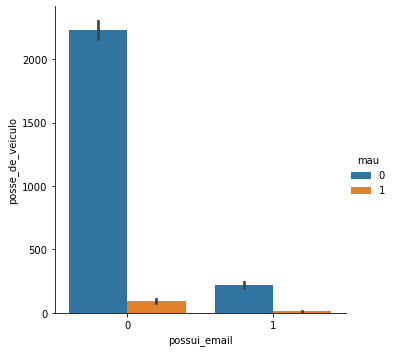

In [73]:
sns.catplot(x='possui_email', y='posse_de_veiculo'
           ,hue='mau'
           ,kind='bar'
           ,estimator=sum
           ,data=df
 #          ,ci=none
           )

In [ ]:
# Dado que os dados de 'Mau' estão desproporcionais, a comparcão de posse de veículo e possui email parecem proporcionais
# para explicar Mau = 1

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [74]:
df.to_csv('df_modulo7.csv')